**단계 1:** 전처리에 사용할 패키지 로드

In [1]:
# coding: utf-8

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn


/Library/Python/3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Library/Python/3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


**단계 2:** 데이터 히스토그램화

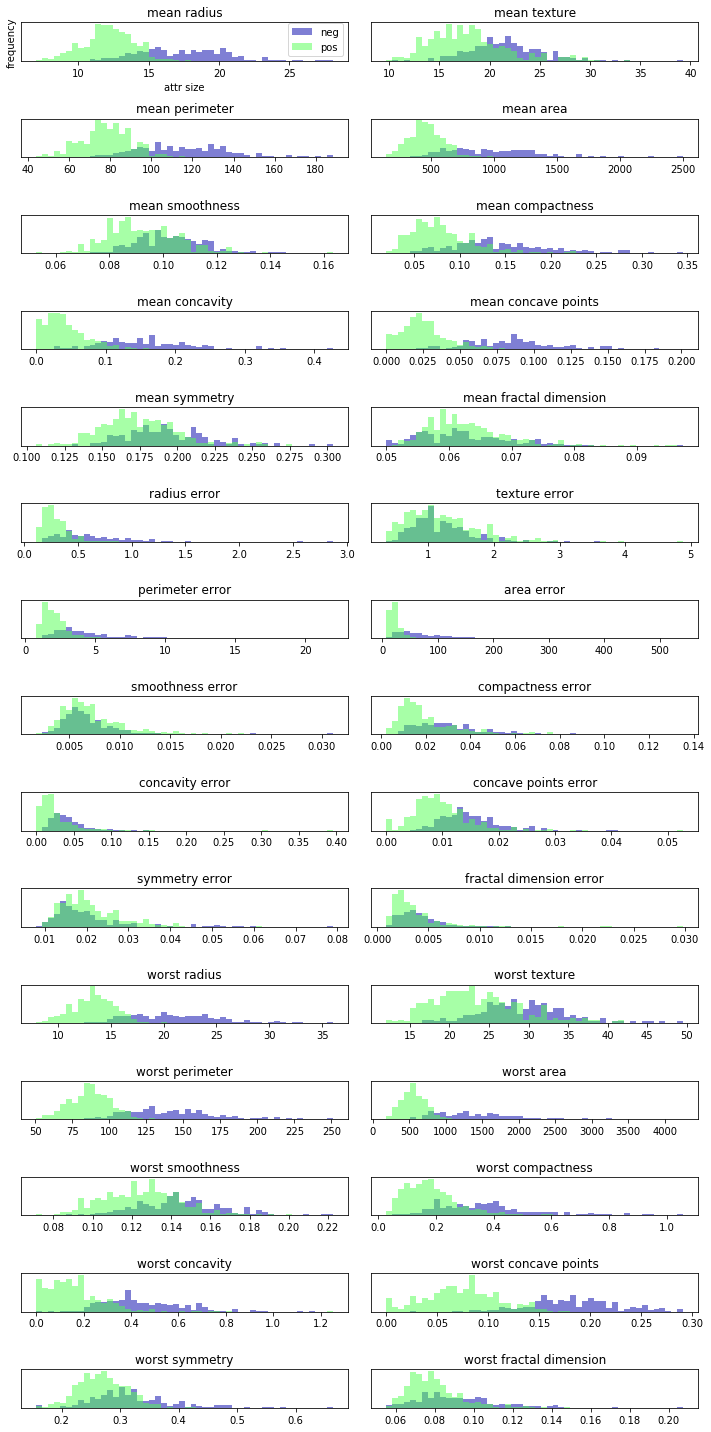

In [2]:
# 유방암 데이터를 로드하고, 이를 히스토그램으로 출력합니다.

cancer = load_breast_cancer()
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("attr size")
ax[0].set_ylabel("frequency")
ax[0].legend(["neg","pos"],loc="best")
fig.tight_layout()
plt.show()

**단계 3:** PCA 변환 및 산점도 그리기

In [3]:
# coding: utf-8

import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
# 정규화를 위해서 StandardScaler()를 사용합니다.
# 정규화는 StandardScaler(), fit (), transform ()순으로 사용합니다.
# 정규화를 할것이라고 명시를 하고, 해당 데이터를 사용 (fit)하고 이를 변환 (transform)합니다.
# 
standard_scaler = 
standard_scaler.fit(cancer.data)
X_scaled = standard_scaler.transform(cancer.data)

# PCA 객체를 생성하고 fit메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소합니다.
# 여기서는 fit 메서드를 호출하고, fit 함수를 사용합니다.
# 기본값일때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지합니다
# PCA (n_components) 함수를 사용합니다.
# 데이터의 차원을 줄이려면 PCA 객체를 지정하면 됩니다.
# n_components는 유지할 성분의 갯수를 의미합니다.

# 데이터 첫 2개의 성분만 유지합니다.
# 두개의 주성분으로 완료가 되었다면, 주 성분의 크기를 변경하며 차원이 얼마나 줄었는지 확인합니다.
pca =  

# PCA 모델 만들기
# fit 함수의 인자로 X_scaled를 받습니다.
pca. 


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


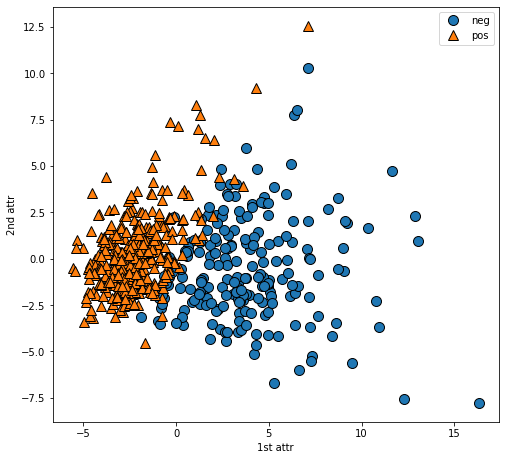

In [4]:
# 처음 두개의 주성분을 사용해 데이터 변환
# transform 함수를 사용하여 차원을 축소합니다.

X_pca = pca.          (X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))
# 원본 데이터 형태 : (569, 30)
# 축소된 데이터 형태 : (569, 2)


# 두개의 주성분을 그래프로 나타내자.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["neg","pos"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

**단계 4:** 히트맵을 시각화하여 상관분석

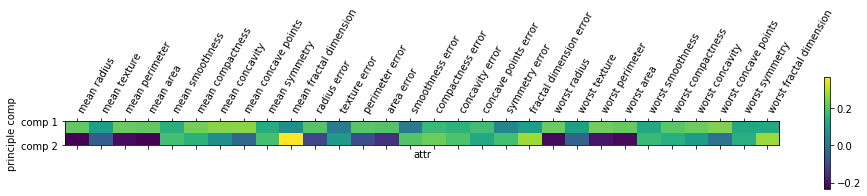

In [5]:
# 히트맵 시각화

plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["comp 1", "comp 2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("attr")
plt.ylabel("principle comp")
plt.show()

